<a href="https://colab.research.google.com/github/RKulagowska/Machine_learning_bootcamp/blob/main/11_regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek 

In [4]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
np.random.seed(42)

In [5]:
y_true = 100 +20 * np.random.randn(50)
y_true

array([109.93428306,  97.23471398, 112.95377076, 130.46059713,
        95.31693251,  95.31726086, 131.58425631, 115.34869458,
        90.61051228, 110.85120087,  90.73164614,  90.68540493,
       104.83924543,  61.73439511,  65.50164335,  88.75424942,
        79.74337759, 106.28494665,  81.83951849,  71.75392597,
       129.31297538,  95.48447399, 101.35056409,  71.50503628,
        89.11234551, 102.21845179,  76.98012845, 107.51396037,
        87.9872262 ,  94.166125  ,  87.96586776, 137.04556369,
        99.73005551,  78.84578142, 116.45089824,  75.583127  ,
       104.1772719 ,  60.80659752,  73.43627902, 103.93722472,
       114.7693316 , 103.42736562,  97.68703435,  93.97792609,
        70.42956019,  85.60311583,  90.78722458, 121.14244452,
       106.87236579,  64.73919689])

In [6]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([113.17512275,  93.38389117, 106.18455076, 136.57736002,
       105.62692773, 104.63006205, 123.19208108, 112.25657082,
        93.9231466 , 120.60665214,  85.93990377,  88.82881516,
        93.77589569,  49.77232887,  73.62690157, 102.3166497 ,
        79.02327638, 116.32027563,  85.45587874,  65.30272843,
       132.92693143, 110.86483965, 100.9923037 ,  87.15147283,
        62.91489447, 110.43747684,  77.85059913, 104.52388686,
        88.90483397,  74.29043586,  85.76914888, 140.61668941,
       114.50899595,  73.66307924, 108.36596221,  70.56555656,
       113.33129308,  64.09410862,  68.13867698, 109.06989905,
       115.74010709, 113.11381553,  90.66650341,  90.70130462,
        66.50847866,  70.96796635,  93.74842735, 123.75299725,
       106.92350036,  62.39332556])

In [8]:
result = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
result.head()

,y_true,y_pred
0,109.934283,113.175123
1,97.234714,93.383891
2,112.953771,106.184551
3,130.460597,136.577360
4,95.316933,105.626928


In [9]:
result['error'] = result['y_true'] - result['y_pred']
result['error_squared']= result['error']**2
result.head()

,y_true,y_pred,error,error_squared
0,109.934283,113.175123,-3.240840,10.503042
1,97.234714,93.383891,3.850823,14.828836
2,112.953771,106.184551,6.769220,45.822339
3,130.460597,136.577360,-6.116763,37.414788
4,95.316933,105.626928,-10.309995,106.296002


In [15]:
print(f"MAE - mean absolute error: {result['error'].abs().sum() /len(result):.4f}")
print(f"MSE - mean squared error: {result['error_squared'].sum() /len(result):.4f}")
print(f"RMSE - root mean squared error: {np.sqrt(result['error_squared'].sum() /len(result)):.4f}")

MAE - mean absolute error: 6.7918
MSE - mean squared error: 74.9471
RMSE - root mean squared error: 8.6572


# Interpretacja graficzna 

In [23]:
def plot_regression_result(y_true, y_pred):
  result = pd.DataFrame({'y_true':y_true, 'y_pred': y_pred})
  min = result[['y_true', 'y_pred']]. min().min()
  max = result[['y_true', 'y_pred']]. max().max()

  fig = go.Figure(data=[go.Scatter(x=result['y_true'], y=result['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800,
                                     xaxis_title='y_true', 
                                     yaxis_title='y_pred',
                                     title='Regresja: y_true vs. y_pred'))
  fig.show()

plot_regression_result(y_true, y_pred) 

In [24]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)

results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']

px.histogram(results, x='error', nbins=50, width=800)

# Mean Absolute Error - MAE - Średni błąd bezwzględny 

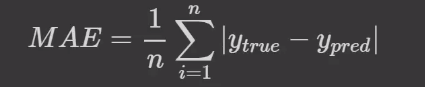

In [25]:
def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).sum() / len(y_true)

mean_absolute_error(y_true, y_pred)

7.910826063285162

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true,y_pred)

7.910826063285162

# Mean Squared Error - MSE - Błąd Średniokwadratowy

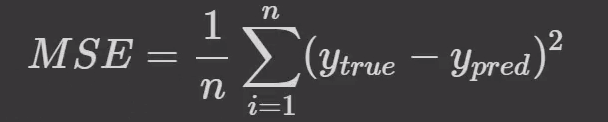

In [27]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

mean_squared_error(y_true, y_pred)

100.09165607706812

In [28]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

100.09165607706812

# Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego

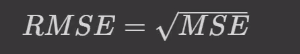

In [29]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

10.004581754229815

In [30]:
np.sqrt(mean_squared_error(y_true, y_pred))

10.004581754229815

# Max Error - Błąd maksymalny 

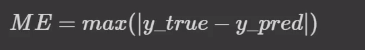

In [31]:
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()

In [32]:

max_error(y_true, y_pred)

31.931075678448607

In [33]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

31.931075678448607

# R2 score - współczynnik determinacji 

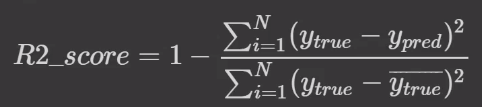

In [34]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7408064339123333

In [35]:
def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_true.mean()) ** 2).sum()
    try:
        r2 = 1 - numerator / denominator
    except ZeroDivisionError:
        print('Dzielenie przez zero')
    return r2

In [36]:
r2_score(y_true, y_pred)

0.7408064339123333